# Project: Stock-Selector

---
Karim Kanji & Sebastian Fallström

IA-20


In [ ]:
!pip install yfinance pmdarima matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression


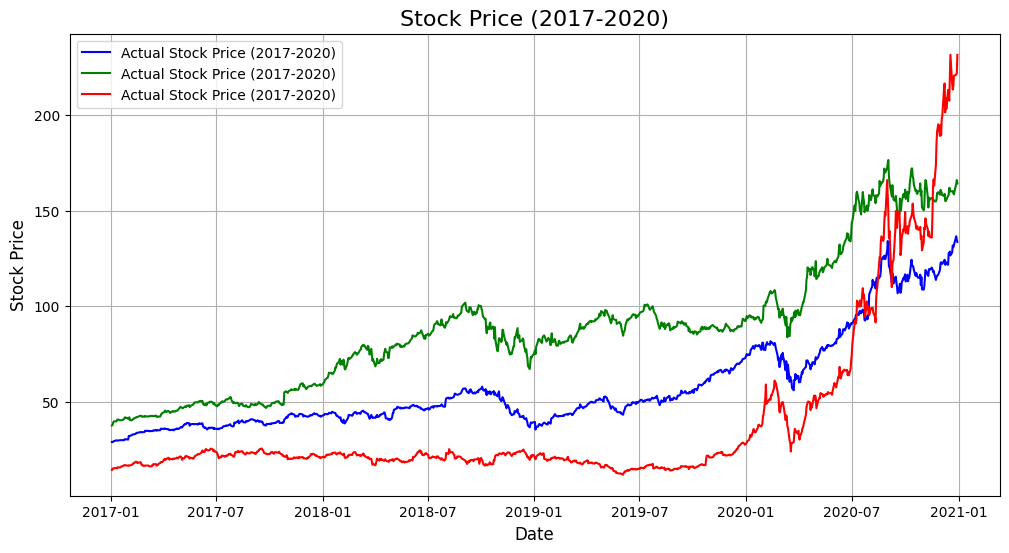

In [ ]:
# Fetching the historical data from yahoo finance
apple = yf.download('AAPL', start='2017-01-01', end='2020-12-31', progress=False)
amazon = yf.download('AMZN', start='2017-01-01', end='2020-12-31', progress=False)
tesla = yf.download('TSLA', start='2017-01-01', end='2020-12-31', progress=False)

# Plotting the historical stock prices for each stock
plt.figure(figsize=(12, 6))
plt.plot(apple['Close'], color='blue', label='Actual Stock Price (2017-2020)')
plt.plot(amazon['Close'], color='green', label='Actual Stock Price (2017-2020)')
plt.plot(tesla['Close'], color='red', label='Actual Stock Price (2017-2020)')
plt.title('Stock Price (2017-2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
print(apple.index)

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


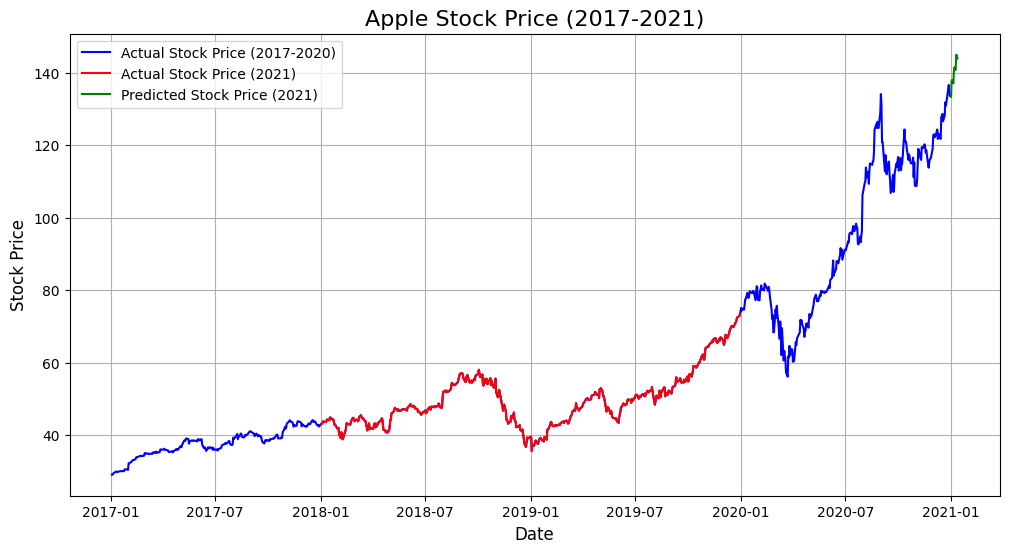

In [ ]:
# Fitting ARIMA model with the CLOSED Column
model_arima = auto_arima(apple['Close'],  seasonal=True, suppress_warnings=True, D=1, m=4)

# Forecasting of future stock prices
forecast = model_arima.predict(n_periods=12)

# Creating a new dataframe for predictions
dates = pd.date_range(start='2021-01-01', periods=12, freq='D')
predictions = pd.DataFrame({'Date': dates, 'Predicted Price': forecast})

# Fetching of historical data for 2021
apple_2021 = yf.download('AAPL', start='2018-01-01', end='2020-01-01', progress=False)

# Combining actual stock prices with predicted stock prices
combined_data = pd.concat([apple['Close'], apple_2021['Close'], predictions['Predicted Price']], axis=0)

# Plotting the stock prices
plt.figure(figsize=(12, 6))
plt.plot(combined_data[:len(apple)], color='blue', label='Actual Stock Price (2017-2020)')
plt.plot(combined_data[len(apple):len(apple)+len(apple_2021)], color='red', label='Actual Stock Price (2021)')
plt.plot(predictions['Date'], predictions['Predicted Price'], color='green', label='Predicted Stock Price (2021)')
plt.title('Apple Stock Price (2017-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


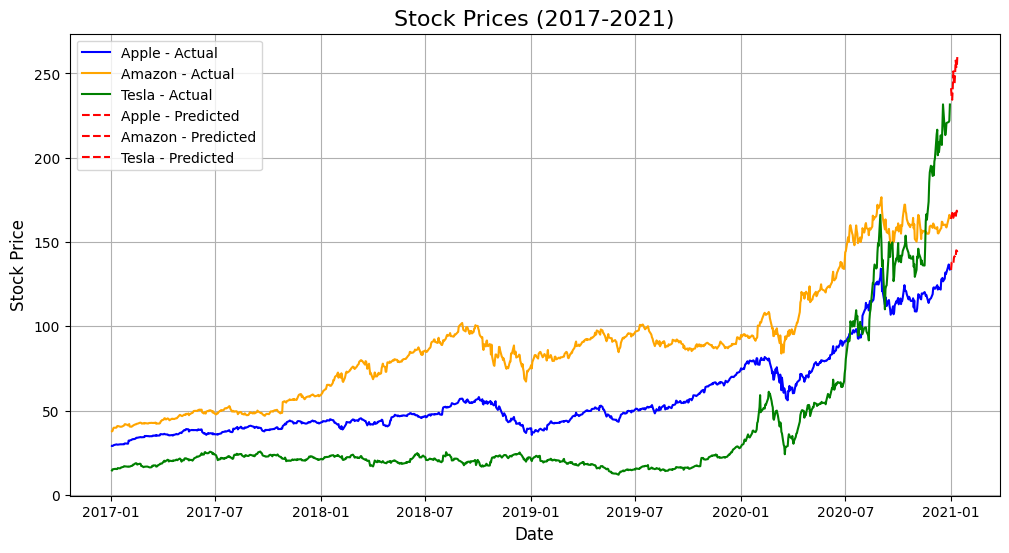

In [ ]:
# Performing Auto-ARIMA and make predictions for each stock
stocks = {'AAPL': apple, 'AMZN': amazon, 'TSLA': tesla}
predictions = {}

for stock_symbol, stock_data in stocks.items():
    # Perform Auto-ARIMA
    model_arima = auto_arima(stock_data['Close'],  seasonal=True, suppress_warnings=True, D=1, m = 4)

    # Forecast future stock prices
    forecast = model_arima.predict(n_periods=12)  # Use n_periods instead of specifying start and end

    # Create a new dataframe for predictions
    dates = pd.date_range(start='2021-01-01', periods=12, freq='D')
    predictions[stock_symbol] = pd.DataFrame({'Date': dates, 'Predicted Price': forecast})

# Fetching historical data
apple_2021 = yf.download('AAPL', start='2018-01-01', end='2020-01-01', progress=False)

# Plotting the predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(apple['Close'], color='blue', label='Apple - Actual')
plt.plot(amazon['Close'], color='orange', label='Amazon - Actual')
plt.plot(tesla['Close'], color='green', label='Tesla - Actual')


plt.plot(predictions['AAPL']['Date'], predictions['AAPL']['Predicted Price'], color='red', linestyle='--', label='Apple - Predicted')
plt.plot(predictions['AMZN']['Date'], predictions['AMZN']['Predicted Price'], color='red', linestyle='--', label='Amazon - Predicted')
plt.plot(predictions['TSLA']['Date'], predictions['TSLA']['Predicted Price'], color='red', linestyle='--', label='Tesla - Predicted')

plt.title('Stock Prices (2017-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()